In [1]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

# 머신러닝 패키지 추가
import statsmodels.api as sm 
import sklearn as sk


# matplolib, 폰트설정
from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumSquareRoundR.ttf']
plt.rcParams['font.size']=14
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font = 'Malgun Gothic' ,rc={'axes.unicode_minus':False}, style='darkgrid')

### 특성공학 / 규제
#### 데이터 준비

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.tail()

,length,height,width
51,42.0,12.80,6.87
52,43.0,11.93,7.28
53,43.0,12.51,7.42
54,43.5,12.60,8.14
55,44.0,12.49,7.60


In [6]:
perch_full = df.to_numpy()
len(perch_full)

56

##### 농어데이터
농어의 길이,높이,두께 --> 농어의 무게 예측

- 무게 데이터

In [4]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
len(perch_weight)

56

#### 훈련세트/데이터세트 분리

In [7]:
from sklearn.model_selection import train_test_split

In [28]:
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight,
                                                                      # test_size=0.3,
                                                                      random_state=42)

In [29]:
print(train_input.shape)
print(test_input.shape)

(42, 3)
(14, 3)


In [30]:
print(test_target.shape)
print(train_target.shape)

(14,)
(42,)


#### sklearn 변환기 
- 특성이 1개 이상일때 특성을 전부 합쳐 새로운 특성으로 만든다.(새 회귀방정식)

In [31]:
from sklearn.preprocessing import PolynomialFeatures

#### example

In [36]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])


array([[2., 3., 4., 6., 9.]])

In [37]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

##### 농어데이터 3개의 특징 transform -> 특징분리

In [38]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input) #입력된 값이 몇개의 특징을 가지는지 알려줌
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [39]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [40]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

#### 다중회귀모델 훈련

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=train_poly,y=train_target)
lr.score(X=train_poly,y=train_target)

0.9903183436982124

In [43]:
lr.score(X=test_poly,y=test_target)

0.9714559911594145

#### 예측 위한 데이터 변환

In [45]:
pred_x =[[50.0,13.5,9.2]]
poly_p= PolynomialFeatures(include_bias=False)
poly_p.fit(train_input) #입력된 값이 몇개의 특징을 가지는지 알려줌
pred_poly = poly.transform(pred_x)
pred_poly.shape

(1, 9)

In [49]:
pred_poly

array([[  50.  ,   13.5 ,    9.2 , 2500.  ,  675.  ,  460.  ,  182.25,
         124.2 ,   84.64]])

In [50]:
#9개 특성으로 예측해야해
lr.predict(X=pred_poly)

array([1634.45893639])

#### 추가

In [51]:
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [52]:
poly.get_feature_names()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [53]:
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target)

0.9999999999996176

In [55]:
lr.score(X=test_poly,y=test_target)

-144.40585108215134

#### 표준화작업
- 입력값 : 평균/표준편차 -> 일정한 단위가 되도록 작업

In [56]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [58]:
train_poly.shape

(42, 55)

In [59]:
train_poly

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [64]:
test_poly

array([[8.40000000e+00, 2.11000000e+00, 1.41000000e+00, 7.05600000e+01,
        1.77240000e+01, 1.18440000e+01, 4.45210000e+00, 2.97510000e+00,
        1.98810000e+00, 5.92704000e+02, 1.48881600e+02, 9.94896000e+01,
        3.73976400e+01, 2.49908400e+01, 1.67000400e+01, 9.39393100e+00,
        6.27746100e+00, 4.19489100e+00, 2.80322100e+00, 4.97871360e+03,
        1.25060544e+03, 8.35712640e+02, 3.14140176e+02, 2.09923056e+02,
        1.40280336e+02, 7.89090204e+01, 5.27306724e+01, 3.52370844e+01,
        2.35470564e+01, 1.98211944e+01, 1.32454427e+01, 8.85122001e+00,
        5.91479631e+00, 3.95254161e+00, 4.18211942e+04, 1.05050857e+04,
        7.01998618e+03, 2.63877748e+03, 1.76335367e+03, 1.17835482e+03,
        6.62835771e+02, 4.42937648e+02, 2.95991509e+02, 1.97795274e+02,
        1.66498033e+02, 1.11261719e+02, 7.43502481e+01, 4.96842890e+01,
        3.32013495e+01, 4.18227202e+01, 2.79478841e+01, 1.86760742e+01,
        1.24802202e+01, 8.33986280e+00, 5.57308367e+00],
       

In [60]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [63]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

#### 규제
- 훈련세트에 치중해서 과대적합이 되지 않도록 규제해주는 작업  : 릿지/라쏘모델

#### 릿지모델

In [66]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=train_scaled,y=train_target)
ridge.score(X=train_scaled,y=train_target)

0.9896101671037343

In [67]:
ridge.score(X=test_scaled,y=test_target)

0.9790693977615383

#### 하이퍼파라미터 alpha 값 찾기 
-  사람이 지정해줘야 하는 것 : 하이퍼파라미터

In [68]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [69]:
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list: # 여섯번 훈련
     ridge = Ridge(alpha=alpha) # 알파 값 변경하면서 6번 생성
     ridge.fit(X=train_scaled,y=train_target)

     train_score.append(ridge.score(X=train_scaled,y=train_target))
     test_score.append(ridge.score(X=test_scaled,y=test_target))

In [70]:
train_score

[0.9930455252088513,
 0.9917809981250514,
 0.9903815817570366,
 0.9896101671037343,
 0.988728468997471,
 0.9841843235774494]

In [71]:
test_score

[0.9569388961546104,
 0.9800187936870526,
 0.9827976465386937,
 0.9790693977615383,
 0.9725329582461569,
 0.9627042641050291]

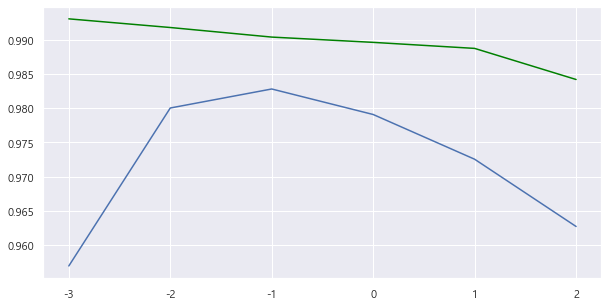

In [76]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list),train_score,color='green')
plt.plot(np.log10(alpha_list),test_score)
plt.show()

In [79]:
# alpha = -1 (0.1) 이 가장 좋다. 적당
ridge = Ridge(alpha=0.1) 
ridge.fit(X=train_scaled,y=train_target)

print(ridge.score(X=train_scaled,y=train_target))
print(ridge.score(X=test_scaled,y=test_target))

0.9903815817570366
0.9827976465386937


In [81]:
print(ridge.coef_)
print(ridge.intercept_)

[ 27.61933479  -1.64022156 -19.73256036  30.0306195   16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]
400.8333333333333


#### 라쏘회귀모델

In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X=train_scaled,y=train_target)
print(lasso.score(X=train_scaled,y=train_target))
print(lasso.score(X=test_scaled,y=test_target))


0.9888067471131867
0.9824470598706695


In [84]:
print(lasso.coef_)
print(lasso.intercept_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
400.8333333333333
